<a href="https://colab.research.google.com/github/VictoriaEFernandez/proyecto-Final-CursoPy/blob/main/Proyecto_Integrador_N%C2%BA3_Victoria_Fernandez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[<img src="https://siliconmisiones.gob.ar/wp-content/uploads/2023/05/cropped-500x500px-logo-silicon.png" alt="Logo Silicon Misiones" width="300"/>](https://siliconmisiones.gob.ar/)

<div class="markdown-google-sans">
  <h1>Python para Ciencia de Datos e Inteligencia Artificial - Proyecto Integrador Nº3</h1>
</div>

# Sobre el Dataset a utilizar

- Este dataset contiene información relacionada con salarios en el ámbito de Data Science a nivel mundial entre 2020 y 2022.
- [`ds_salaries.csv`](https://gist.githubusercontent.com/mzapf/2004abf1a9e38e6951625f3cf055d133/raw/0c6182893c3ae04f2fcb39283723fdf5cfd0ecbd/ds_salaries.csv) fue generado por [Ruchi Bhatia](https://ruchisbhatia.com/) con datos de [ai-jobs.net](https://ai-jobs.net/).

## Descripción de cada columna

| Columna             | Descripción                                                                                                        |
|--------------------|--------------------------------------------------------------------------------------------------------------------|
| work_year          | El año en que se pagó el salario.                                                                                  |
| experience_level   | El nivel de experiencia en el trabajo durante el año con los siguientes valores posibles: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director |
| employment_type    | El tipo de empleo para el rol: PT Part-time FT Full-time CT Contract FL Freelance                                   |
| job_title          | El puesto desempeñado durante el año.                                                                              |
| salary             | El monto total del salario bruto pagado.                                                                           |
| salary_currency    | La moneda en la que se pagó el salario según el código ISO 4217.                                                   |
| salary_in_usd      | El salario en USD (tasa de cambio promedio dividida por la tasa USD del año respectivo, según fxdata.foorilla.com). |
| employee_residence | El país de residencia principal del empleado durante el año laboral, según el código de país ISO 3166.              |
| remote_ratio       | La cantidad total de trabajo realizado de forma remota, los valores posibles son: 0 Sin trabajo remoto (menos del 20%) 50 Parcialmente remoto 100 Completamente remoto (más del 80%) |
| company_location   | El país de la oficina principal o sucursal contratante del empleador, según el código de país ISO 3166.             |
| company_size       | El número promedio de empleados que trabajaron para la empresa durante el año: S menos de 50 empleados (pequeña) M 50 a 250 empleados (mediana) L más de 250 empleados (grande) |


# Análisis Exploratorio de Datos

## Importación del dataset y módulos a utilizar

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

dataset_url = "https://gist.githubusercontent.com/mzapf/2004abf1a9e38e6951625f3cf055d133/raw/0c6182893c3ae04f2fcb39283723fdf5cfd0ecbd/ds_salaries.csv"

# Importación del dataset con pandas
data = pd.read_csv(dataset_url)

# Si trabajamos con el objeto EDA (POO) de la Clase 24;
# data = EDA(dataset_url, 'csv')
# data.df retorna el DataFrame

## Paso a paso del Análisis Exploratorio de Datos

In [ ]:
#Mostramos las primeras 10 ingresos, para visualizar la tabla
data.head(10+1) #Mostramos los primeros 10 datos


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L
6,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,US,S
7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
8,2020,MI,FT,Business Data Analyst,135000,USD,135000,US,100,US,L
9,2020,SE,FT,Lead Data Engineer,125000,USD,125000,NZ,50,NZ,S


### 1. Conociendo la estructura inicial del dataset

Antes de comenzar a analizar en profundidad los datos, es importante entender cuántas observaciones (filas) y variables (columnas) tenemos.

In [6]:
num_observaciones = data.shape[0]  # Número de filas
num_variables = data.shape[1]      # Número de columnas

print(f"Observaciones (filas): {num_observaciones}")
print(f"Variables (columnas): {num_variables}")

Observaciones (filas): 607
Variables (columnas): 11


### 2. Explorando los tipos de datos

Conocer los tipos de datos de cada columna nos permitirá entender mejor cómo están estructurados los datos, lo cual es crucial para decidir cómo manipularlos y analizarlos más adelante.

In [7]:
# Mostrar los tipos de datos de cada columna
def mostrarTipoColumnas(df):

    #param df: DataFrame con los datos.
    if df is not None:
        print("Tipos de datos de las columnas:")
        display(df.dtypes)
    else:
        print("El DataFrame no está disponible.")
mostrarTipoColumnas(data)

Tipos de datos de las columnas:


,0
work_year,int64
experience_level,object
employment_type,object
job_title,object
salary,int64
salary_currency,object
salary_in_usd,int64
employee_residence,object
remote_ratio,int64
company_location,object


### 3. Explorando las primeras y últimas filas del dataset

Para tener una idea inicial del contenido del dataset, es útil que observemos las primeras y últimas filas. Esto nos dará una visión general de cómo están organizados los datos y qué tipo de información contienen.

In [8]:
def primeras_ultimas_filas(df,n=2):
  #df: DataFrame con los datos
  #n: Numero de filas para mostrar
  if df is not None:
    print(f"Primeras {n} filas:")
    display(df.head(n))
    print(f"\nÚltimas {n} filas:")
    display(df.tail(n))
  else:
    print("El DataFrame está vacío.")
primeras_ultimas_filas(data)

Primeras 2 filas:


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S



Últimas 2 filas:


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M
606,2022,MI,FT,AI Scientist,200000,USD,200000,IN,100,US,L


### 4. Identificando los valores nulos

Es fundamental que identifiquemos si hay valores faltantes en nuestro dataset, ya que estos pueden influir en el análisis posterior. Detectar los valores nulos nos dará una idea de las columnas que requieren atención o tratamiento especial antes de proceder con el análisis.

In [9]:
def identificarValoresNulos(df):
  #Identida el porcentaje de valores nulos por COLUMNA
  if df is not None:
    total_perdido = df.isnull().sum()
    porcentaje_perdido = (total_perdido / df.shape[0]) * 100
    df_perdido = pd.DataFrame({'Total Perdido': total_perdido, 'Porcentaje Perdido': porcentaje_perdido})
    perdido_columnas = df_perdido[df_perdido['Total Perdido'] > 0]
    if perdido_columnas.empty:
      print("No hay valores nulos en el DataFrame.")
    else:
        print("Porcentaje de valores nulos por columna:")
        display(perdido_columnas)
  else:
    print("El DataFrame está vacío.")
identificarValoresNulos(data)

No hay valores nulos en el DataFrame.


### 5. Detectando filas duplicadas

Es importante que revisemos si nuestro dataset contiene filas duplicadas, ya que pueden distorsionar los resultados del análisis. Identificar estos duplicados nos permitirá limpiarlos para asegurar que los datos sean precisos y confiables.

In [10]:
def detectarDuplicados(df):
  #Verificar si hay duplicados
  duplicados = df[df.duplicated()]
  #Mostrar las filas duplicadas
  if not duplicados.empty:
    cantidadDuplicados = len(duplicados)
    print(f"Se encontraron {cantidadDuplicados} filas duplicadas")
    print("Filas duplicadas:")
    display(duplicados)
  else:
    print("No hay filas duplicadas en el DataFrame.")
detectarDuplicados(data)

Se encontraron 42 filas duplicadas
Filas duplicadas:


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
217,2021,MI,FT,Data Scientist,76760,EUR,90734,DE,50,DE,L
256,2021,MI,FT,Data Engineer,200000,USD,200000,US,100,US,L
331,2022,SE,FT,Data Analyst,90320,USD,90320,US,100,US,M
332,2022,SE,FT,Data Analyst,112900,USD,112900,US,100,US,M
333,2022,SE,FT,Data Analyst,90320,USD,90320,US,100,US,M
353,2022,SE,FT,Data Scientist,123000,USD,123000,US,100,US,M
362,2022,SE,FT,Data Analyst,130000,USD,130000,CA,100,CA,M
363,2022,SE,FT,Data Analyst,61300,USD,61300,CA,100,CA,M
370,2022,SE,FT,Data Scientist,123000,USD,123000,US,100,US,M
374,2022,MI,FT,ETL Developer,50000,EUR,54957,GR,0,GR,M


### 6. Calculando estadísticas básicas

Obtener un resumen de las estadísticas descriptivas nos permitirá entender mejor las características principales de las variables numéricas y categóricas del dataset. Esto nos dará una visión general sobre la distribución, los promedios, las desviaciones y otros aspectos importantes de los datos.

Estadísticas descriptivas de variables numéricas: 


,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000



Resumen básico del DataFrame:


,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,607,607,607,607,607,607,607
unique,4,4,50,17,57,50,3
top,SE,FT,Data Scientist,USD,US,US,M
freq,280,588,143,398,332,355,326


Moda de las variables categóricas:


,0
experience_level,SE
employment_type,FT
job_title,Data Scientist
salary_currency,USD
employee_residence,US
company_location,US
company_size,M



Visualización: Histogramas de variables numéricas


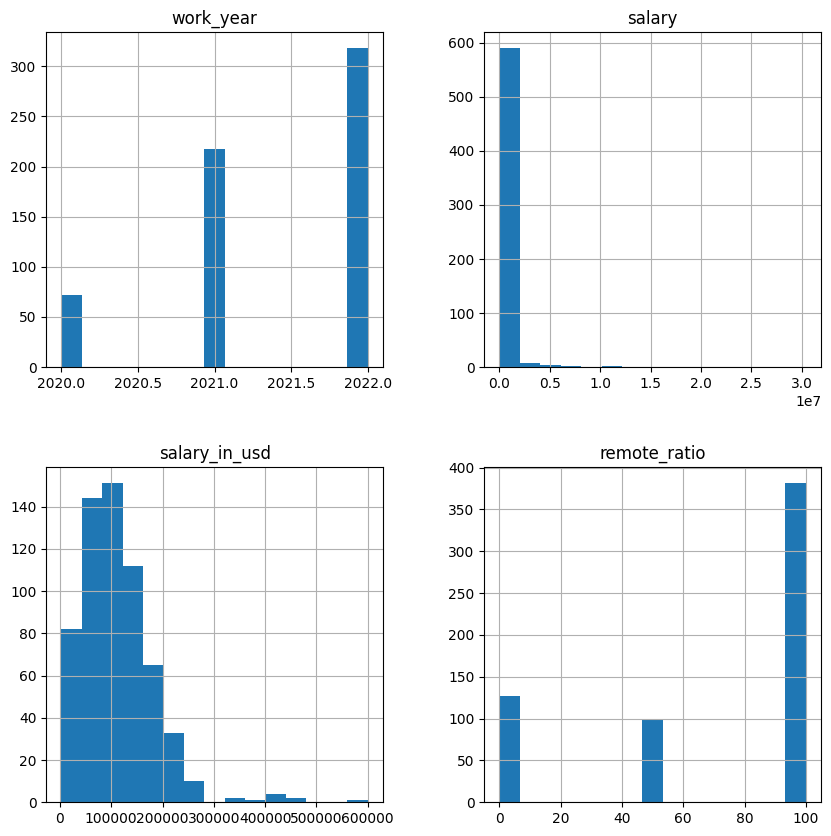

In [11]:
#Funcion que muestre estadisticas descriptivas de las columnas numericas y un resumen basico
# Función que muestra estadísticas descriptivas de las columnas numéricas y categóricas
def calcularEstadisticasBasicas(df):
    if df is not None:
        # Estadísticas descriptivas de las columnas numéricas
        print("Estadísticas descriptivas de variables numéricas: ")
        e_resumen = df.describe(include=[np.number]) #Calcula el resumen estadisticos de las columnas
        display(e_resumen)

        # Estadísticas descriptivas de las columnas categóricas
        print("\nResumen básico del DataFrame:")
        r_resumen = df.describe(include=['object', 'category'])# Calcular el resumen estadístico para las columnas categóricas (tipo 'object' y 'category')
        display(r_resumen)

        # Moda de las columnas categóricas
        print("Moda de las variables categóricas:")
        #Calcular la Moda: Valor mas frecuente de las columnas categorica
        m_resumen = df.select_dtypes(include=['object', 'category']).mode().iloc[0]
        display(m_resumen)

        # Mostrar histogramas de las columnas numéricas
        print("\nVisualización: Histogramas de variables numéricas")
        #Crear un histograma para cada columna en el dataframe
        df.select_dtypes(include=[np.number]).hist(bins=15, figsize=(10, 10))
        #Mostrar los graficos
        plt.show()
        #Este método crea gráficos de barras que muestran la frecuencia de los valores en intervalos específicos.
    else:
        print("El DataFrame está vacío.")
calcularEstadisticasBasicas(data)

### 7. Resumen de valores únicos

Es útil que revisemos cuántos valores únicos existen en cada columna del dataset. Esto nos ayudará a entender la diversidad de los datos, especialmente en las columnas categóricas, y a identificar posibles oportunidades para segmentar o analizar los datos en mayor profundidad.

In [12]:
def resumenValoresUnicos(df):
    # Verificar si el DataFrame no está vacío
    if df is not None:
        # Mostrar el resumen de valores únicos de las columnas
        print("Resumen de valores únicos por columna:")

        # Iterar sobre cada columna del DataFrame
        for columna in df.columns:
            # Obtener los valores únicos de la columna
            valores_unicos = df[columna].unique()
            # Mostrar el nombre de la columna y el número de valores únicos
            print(f"{columna}: {len(valores_unicos)} valores únicos")

            # Si hay pocos valores únicos, mostrar los valores
            if len(valores_unicos) <= 10:  # Por ejemplo, si hay 10 o menos valores únicos
                print(f"Valores únicos en {columna}: {valores_unicos}")
            print()

    else:
        # Mostrar un mensaje si el DataFrame está vacío
        print("El DataFrame está vacío.")

# Llamar a la función con tu DataFrame 'data'
resumenValoresUnicos(data)


Resumen de valores únicos por columna:
work_year: 3 valores únicos
Valores únicos en work_year: [2020 2021 2022]

experience_level: 4 valores únicos
Valores únicos en experience_level: ['MI' 'SE' 'EN' 'EX']

employment_type: 4 valores únicos
Valores únicos en employment_type: ['FT' 'CT' 'PT' 'FL']

job_title: 50 valores únicos

salary: 272 valores únicos

salary_currency: 17 valores únicos

salary_in_usd: 369 valores únicos

employee_residence: 57 valores únicos

remote_ratio: 3 valores únicos
Valores únicos en remote_ratio: [  0  50 100]

company_location: 50 valores únicos

company_size: 3 valores únicos
Valores únicos en company_size: ['L' 'S' 'M']



### 8. Visualizando la matriz de correlación

Para comprender mejor las relaciones entre las variables numéricas, es útil que generemos una matriz de correlación. Esto nos permitirá identificar posibles patrones o relaciones entre las variables, lo cual es crucial para análisis más profundos y para la construcción de modelos predictivos.

Visualización con seaborn.heatmap(): Muestra un mapa de calor de la matriz de correlación. Aquí:

annot=True: Anota los valores de correlación dentro de las celdas del heatmap.

cmap='coolwarm': Usa una paleta de colores para resaltar las correlaciones positivas y negativas.

fmt=".2f": Formatea los valores de correlación para que se muestren con 2 decimales.

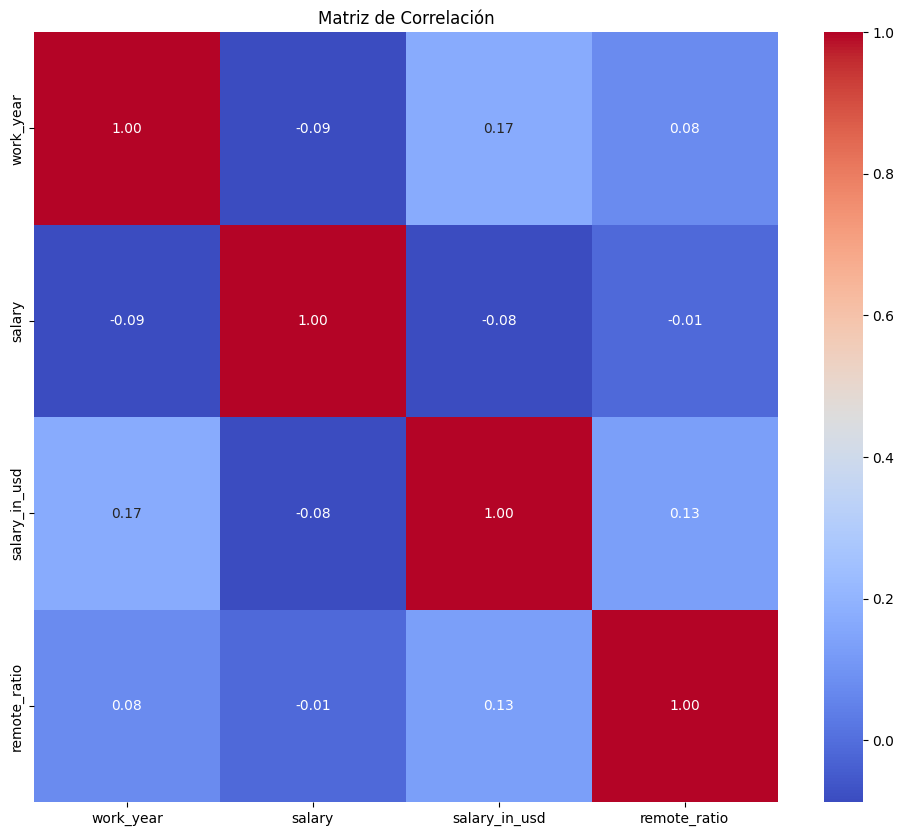

In [13]:
def matrizDeCorrelacion(df):
  #Matriz de correlacion
  if df is not None:
    # Seleccionar solo las columnas numericas
    n_columnas = df.select_dtypes(include=[np.number]).columns
    if len(n_columnas) > 1: #Verifica si hay mas de una col. numerica
      matriz_corr = df[n_columnas].corr() #Calcular la matriz de correlacion(usando solo numericas)
      plt.figure(figsize=(12, 10)) #Configura el tamaño de la visualizacion
      #Crear el mapa de calor con anotaciones de los valores de correlacion
      sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f")
      plt.title('Matriz de Correlación')
      plt.show()
    else:
      print("No hay suficientes columnas numéricas para calcular la matriz de correlación.")
  else:
    print("El DataFrame está vacío.")
matrizDeCorrelacion(data)

### 9. Analizando la distribución por año

Vamos a revisar cuántas observaciones tenemos para cada año en la variable `work_year` del dataset. Esto nos permitirá entender mejor la distribución temporal de los datos.

Distribución por año:
work_year
2020     72
2021    217
2022    318
Name: count, dtype: int64


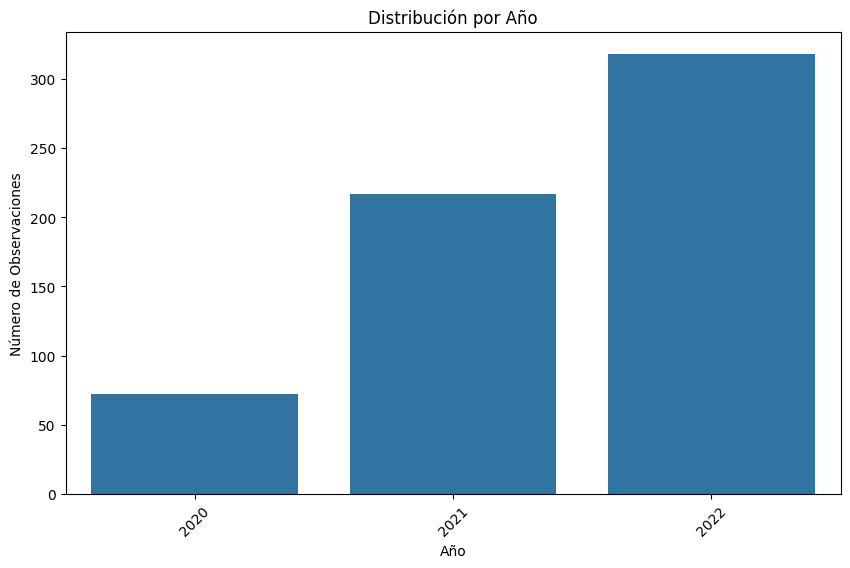

In [14]:

def analizarDistribucionporAnio(df):
    # Verificar si el DataFrame no está vacío
    if df is not None:
        # Contar cuántas veces aparece cada año en la columna 'work_year'
        observaciones_por_anio = df['work_year'].value_counts().sort_index()

        # Mostrar la distribución en forma de tabla
        print("Distribución por año:")
        print(observaciones_por_anio)

        # Visualizar la distribución en un gráfico de barras
        plt.figure(figsize=(10, 6))

        # No se utiliza 'hue' ya que no es necesario en este caso
        sns.barplot(x=observaciones_por_anio.index, y=observaciones_por_anio.values)

        # Agregar etiquetas y título al gráfico
        plt.xlabel('Año')
        plt.ylabel('Número de Observaciones')
        plt.title('Distribución por Año')
        plt.xticks(rotation=45) #Rotar las etiquetas
        plt.show()
    else:
        print("El DataFrame está vacío.")

# Llamar a la función con tu DataFrame 'data'
analizarDistribucionporAnio(data)



### 10. Analizando la distribución del trabajo remoto

Revisemos la cantidad de observaciones para cada nivel de `remote_ratio` en el dataset. Esto nos ayudará a entender la frecuencia de trabajo presencial, híbrido y remoto.

Distribución del trabajo remoto:
remote_ratio
0      127
50      99
100    381
Name: count, dtype: int64


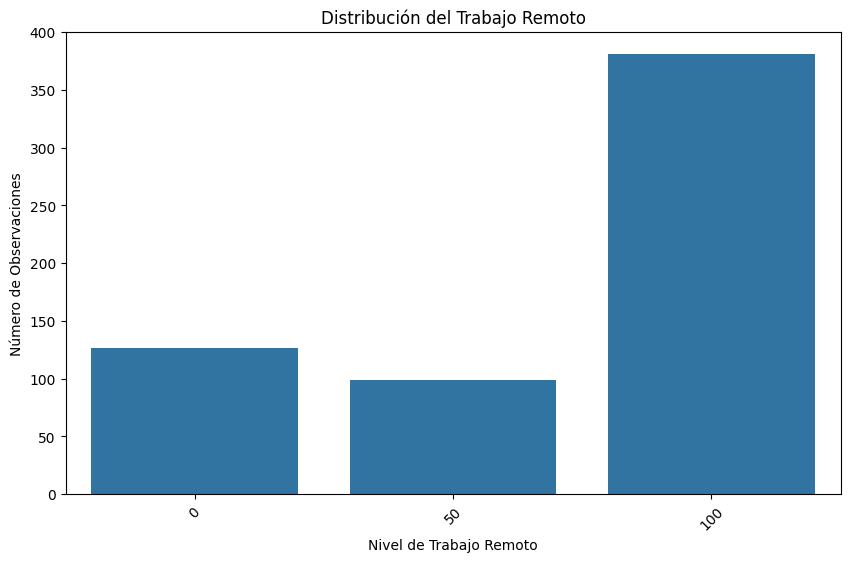

In [15]:
def analizarDistribucionTrabajoRemoto(df):
    # Verificar si el DataFrame no está vacío
    if df is not None:
        # Contar cuántas veces aparece cada valor en la columna 'remote_ratio'
        observaciones_por_remote = df['remote_ratio'].value_counts().sort_index()

        # Mostrar la distribución en forma de tabla
        print("Distribución del trabajo remoto:")
        print(observaciones_por_remote)

        # Visualizar la distribución en un gráfico de barras
        plt.figure(figsize=(10, 6))
        sns.barplot(x=observaciones_por_remote.index, y=observaciones_por_remote.values)

        # Agregar etiquetas y título al gráfico
        plt.xlabel('Nivel de Trabajo Remoto')
        plt.ylabel('Número de Observaciones')
        plt.title('Distribución del Trabajo Remoto')
        plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad
        plt.show()
    else:
        print("El DataFrame está vacío.")

# Llama a la función pasando tu DataFrame
analizarDistribucionTrabajoRemoto(data)



### 11. Los 10 roles más populares en la ciencia de datos

Vamos a visualizar los 10 roles más frecuentes en la variable `job_title` del dataset. Esto nos permitirá identificar cuáles son los roles más comunes en el ámbito de la ciencia de datos.

Los 10 roles más populares en el dataset:
job_title
Data Scientist                143
Data Engineer                 132
Data Analyst                   97
Machine Learning Engineer      41
Research Scientist             16
Data Science Manager           12
Data Architect                 11
Big Data Engineer               8
Machine Learning Scientist      8
Principal Data Scientist        7
Name: count, dtype: int64


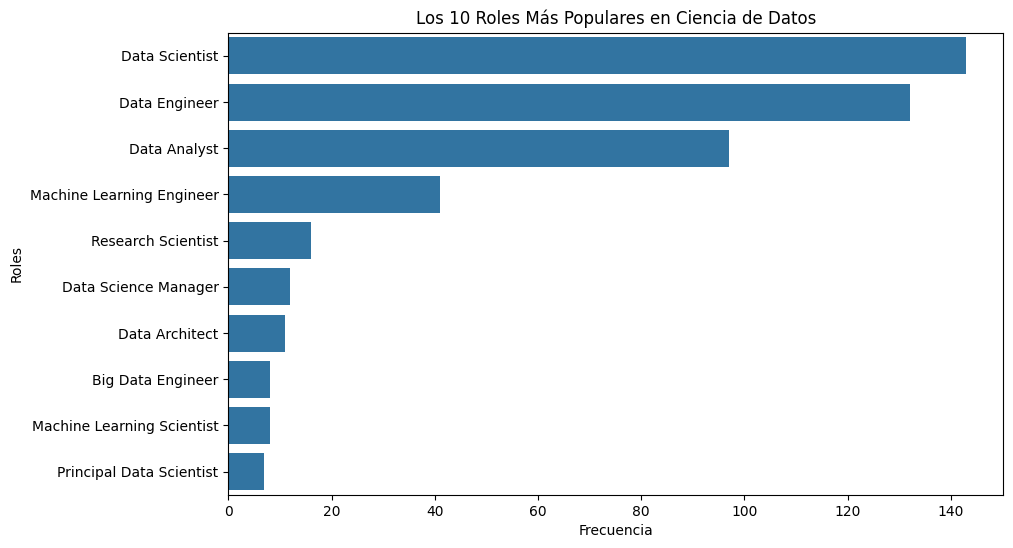

In [16]:
def visualizar_roles_populares(df):
    """
    Visualiza los 10 roles más frecuentes en la columna 'job_title' del DataFrame.

    :param df: DataFrame que contiene los datos.
    """
    # Verificar si el DataFrame no está vacío y que la columna 'job_title' exista
    if df is not None and 'job_title' in df.columns:
        # Contar las ocurrencias de cada rol en la columna 'job_title'
        conteo_roles = df['job_title'].value_counts().head(10)  # Tomar los 10 roles más frecuentes

        # Mostrar la tabla con los roles más frecuentes
        print("Los 10 roles más populares en el dataset:")
        print(conteo_roles)

        # Visualizar los datos en un gráfico de barras
        plt.figure(figsize=(10, 6))
        sns.barplot(x=conteo_roles.values, y=conteo_roles.index)
        plt.xlabel('Frecuencia')
        plt.ylabel('Roles')
        plt.title('Los 10 Roles Más Populares en Ciencia de Datos')
        plt.show()
    else:
        print("El DataFrame está vacío o no contiene la columna 'job_title'.")

# Llamar a la función con el DataFrame
visualizar_roles_populares(data)

### 12. Los 10 roles mejor pagados en ciencia de datos

Vamos a visualizar los 10 roles mejor pagados en la variable `job_title` del dataset, basándonos en la columna de `salary_in_usd`. Esto nos permitirá identificar los puestos con los salarios más altos en el ámbito de la ciencia de datos.

Los 10 roles mejor pagados en el dataset:
job_title
Data Analytics Lead         405000.00
Principal Data Engineer     328333.33
Financial Data Analyst      275000.00
Principal Data Scientist    215242.43
Director of Data Science    195074.00
Data Architect              177873.91
Applied Data Scientist      175655.00
Analytics Engineer          175000.00
Data Specialist             165000.00
Head of Data                160162.60
Name: salary_in_usd, dtype: float64


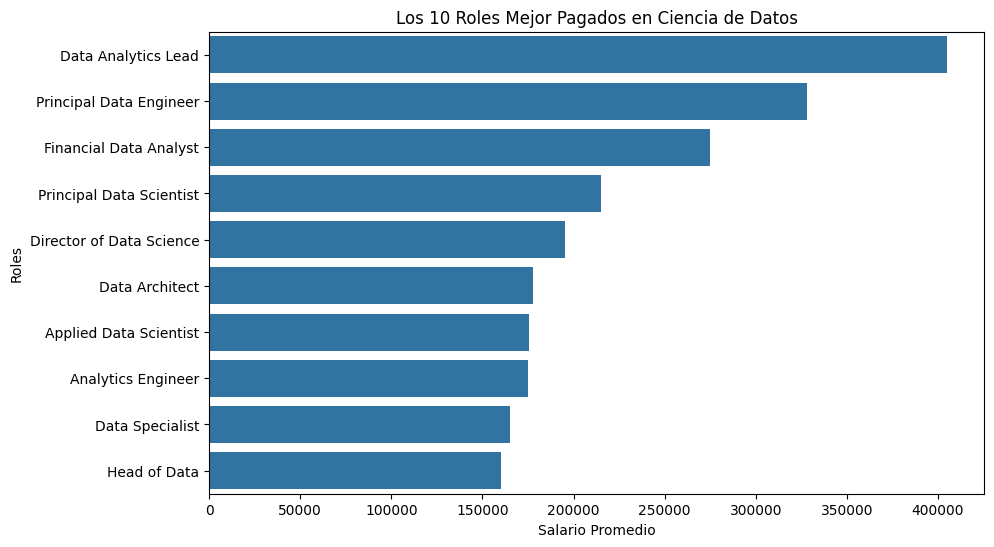

In [17]:
def visualizarRolesMejorPagados(df):
  #Verificar si el DF no esta vacio y que las columnas 'job_title' y 'salary' existan
  if df is not None and 'job_title' in df.columns and 'salary_in_usd' in df.columns:
    #Calcular el salario promedio por cada rol
    salarios_promedio = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).head(10).round(2)
    #Mostrar la tabla con los roles mejor pagados
    print("Los 10 roles mejor pagados en el dataset:")
    print(salarios_promedio)
    #Visualizar los datos en un grafico de barras
    plt.figure(figsize=(10,6))
    sns.barplot(x=salarios_promedio.values, y=salarios_promedio.index)
    plt.xlabel('Salario Promedio')
    plt.ylabel('Roles')
    plt.title('Los 10 Roles Mejor Pagados en Ciencia de Datos')
    plt.show()
  else:
    print("El DataFrame esta vacio o no contiene dichas columnas")
visualizarRolesMejorPagados(data)

### 13. Los 10 roles más importantes en ciencia de datos según el salario promedio

Vamos a calcular y visualizar los 10 roles en ciencia de datos con el salario promedio más alto, basándonos en la variable `job_title` y `salary_in_usd`. Esto nos permitirá identificar los puestos más valorados económicamente en el campo de la ciencia de datos.

Los 10 roles más importantes en ciencia de datos según el salario promedio:
job_title
Data Analytics Lead         405000.00
Principal Data Engineer     328333.33
Financial Data Analyst      275000.00
Principal Data Scientist    215242.43
Director of Data Science    195074.00
Data Architect              177873.91
Applied Data Scientist      175655.00
Analytics Engineer          175000.00
Data Specialist             165000.00
Head of Data                160162.60
Name: salary_in_usd, dtype: float64


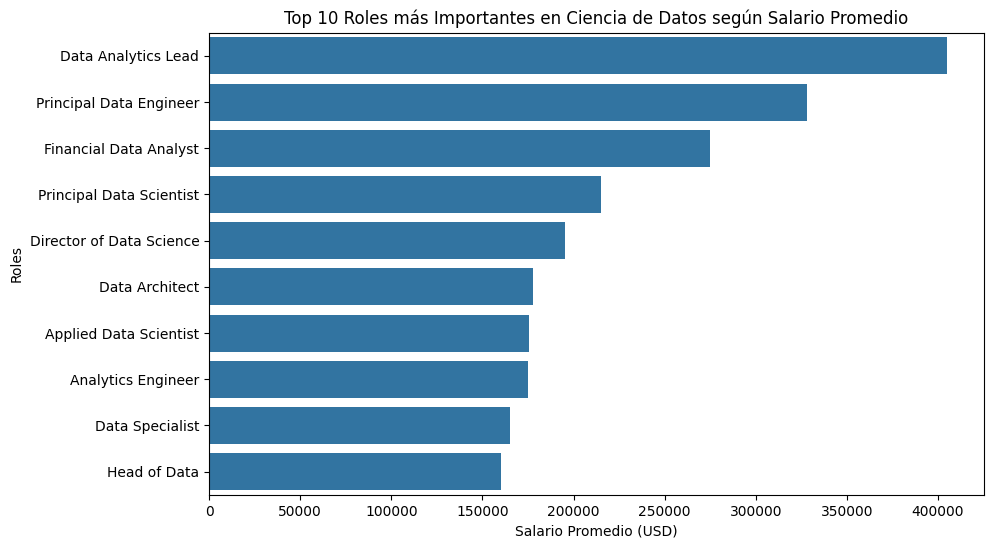

In [18]:
def roles_mas_importantes_por_salario(df):
    """
    Calcula y visualiza los 10 roles más importantes en ciencia de datos según el salario promedio.

    :param df: DataFrame que contiene las columnas 'job_title' y 'salary_in_usd'.
    """
    # Verificar si el DataFrame no está vacío y que las columnas 'job_title' y 'salary_in_usd' existan
    if df is not None and 'job_title' in df.columns and 'salary_in_usd' in df.columns:
        # Calcular el salario promedio por cada rol, redondear a 2 decimales y ordenar de mayor a menor
        salario_promedio_por_rol = df.groupby('job_title')['salary_in_usd'].mean().round(2).sort_values(ascending=False).head(10)

        # Mostrar los 10 roles con el salario promedio más alto
        print("Los 10 roles más importantes en ciencia de datos según el salario promedio:")
        print(salario_promedio_por_rol)

        # Visualizar los datos en un gráfico de barras
        plt.figure(figsize=(10, 6))
        sns.barplot(x=salario_promedio_por_rol.values, y=salario_promedio_por_rol.index)
        plt.xlabel('Salario Promedio (USD)')
        plt.ylabel('Roles')
        plt.title('Top 10 Roles más Importantes en Ciencia de Datos según Salario Promedio')
        plt.show()
    else:
        print("El DataFrame está vacío o no contiene las columnas necesarias ('job_title', 'salary_in_usd').")

# Llamar a la función con el DataFrame
roles_mas_importantes_por_salario(data)



### 14. Total de empleos según nivel de experiencia

Vamos a visualizar la distribución del total de empleos para cada nivel de experiencia, utilizando la variable `experience_level` del dataset. De esta forma, podremos identificar cómo se distribuyen los puestos de trabajo entre los diferentes niveles de experiencia.

Total de empleos por nivel de experiencia:
experience_level
EN     88
EX     26
MI    213
SE    280
Name: count, dtype: int64


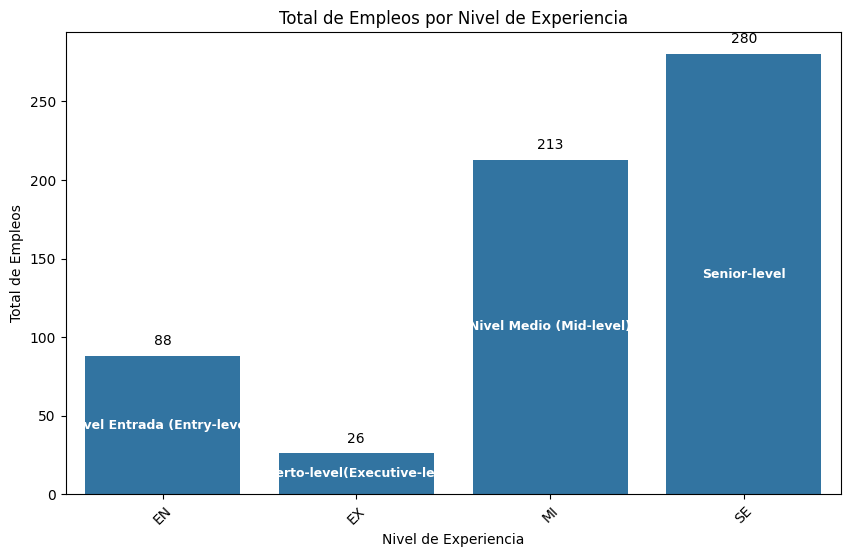

In [19]:
def totalEmpleosPorNivelExperiencia(df):
  #df: DF que contiene la columna 'experience_level'
  #Veriricar si el DF no esta vacio, y que la columna exista
  if df is not None and 'experience_level' in df.columns:
    #Contar cuantas veces aparece cada nivel de experiencia
    total_empleos = df['experience_level'].value_counts().sort_index()
    #Mostrar la distribucion en forma de tabla
    print("Total de empleos por nivel de experiencia:")
    print(total_empleos)
    #Visualizar la distribucion en un grafico de barras
    plt.figure(figsize=(10,6))
    ax = sns.barplot(x=total_empleos.index, y=total_empleos.values)
    plt.xlabel('Nivel de Experiencia')
    plt.ylabel('Total de Empleos')
    plt.title('Total de Empleos por Nivel de Experiencia')
    #Agregar anotaciones explicando los niveles de experiencia
    niveles ={'EN':'Nivel Entrada (Entry-level)',
              'EX':'Experto-level' '(Executive-level)',
              'MI':'Nivel Medio (Mid-level)',
              'SE':'Senior-level'
              }
    # Añadir anotaciones encima de cada barra
    for i, (indice, valor) in enumerate(total_empleos.items()):
        ax.text(i, valor + 5, f'{valor}', ha='center', va='bottom', fontsize=10)
        ax.text(i, valor/2, niveles[indice], ha='center', va='center', fontsize=9, color='white', fontweight='bold')
    plt.xticks(rotation=45)
    plt.show()
  else:
    print("El DataFrame esta vacio o no contiene la columna 'experience_level'")
totalEmpleosPorNivelExperiencia(data)

### 15. Porcentaje de trabajos on-site, híbridos y remotos

Vamos a visualizar el porcentaje de trabajos que son on-site, híbridos y remotos, utilizando la variable `remote_ratio` del dataset. Esto nos ayudará a comprender mejor la distribución de las modalidades de trabajo en el campo de la ciencia de datos.

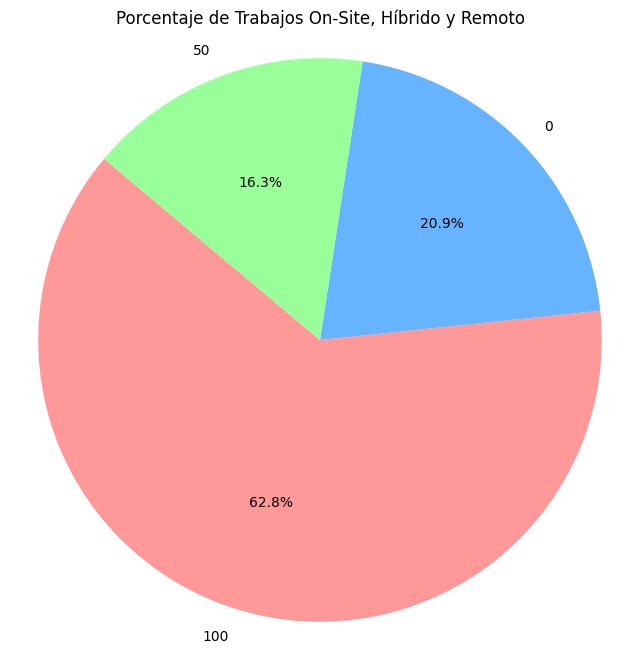

In [ ]:
def porcentajeTrabajoModalidad(df):
  if df is not None:
    #Contar la cantidad de empleos por modalidad de trabajo
    modalidades = df['remote_ratio'].value_counts(normalize=True) * 100 #
    #Crear el grafico de pastel para visualizar los procentajes
    plt.figure(figsize=(8, 8))
    plt.pie(modalidades, labels=modalidades.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
    plt.title('Porcentaje de Trabajos On-Site, Híbrido y Remoto')
    plt.axis('equal')  # Para que el gráfico sea circular
    plt.show()
  else:
    print("El DF esta vacio")
porcentajeTrabajoModalidad(data)


### 16. Gráfico KDE de la distribución de los salarios en USD

Vamos a crear un gráfico KDE para visualizar la distribución de los salarios en USD, utilizando la variable `salary_in_usd` del dataset. Este gráfico nos permitirá observar la densidad de los salarios y cómo se distribuyen dentro del dataset.

KDE: Forma de estimar la funcion de densidad de probabiliad de una variable continua, como el salario.

Histograma -> Agrupa los datos en intervalo

KDE -> suaviza los datos, proporcionando una cirva continua que muestra como se distribuyen los valores en el conjunto de datos.



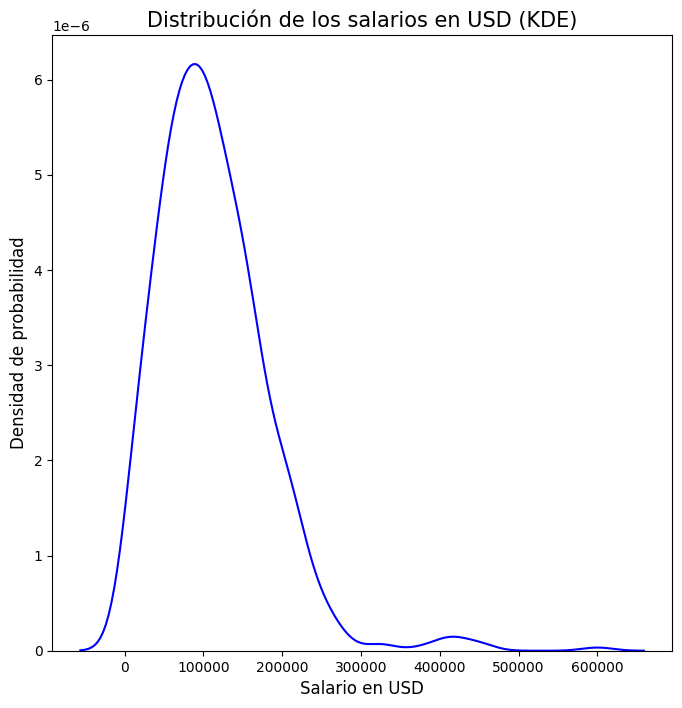

In [3]:
def graficoKDEsalarios(df):
  #Verificar si el DF no esta vacio, y que la columna exista
  if df is not None and 'salary_in_usd' in df.columns:
    #Crear el grafico KDE
    plt.figure(figsize=(8,8))
    sns.kdeplot(df['salary_in_usd'], color='blue')
    #Personalizar el grafico
    plt.title('Distribución de los salarios en USD (KDE)', fontsize= 15)
    plt.xlabel('Salario en USD', fontsize = 12)
    plt.ylabel('Densidad de probabilidad', fontsize = 12)
    plt.show()
  else:
    print("El DataFrame esta vacio o no contiene la columna 'salary_in_usd'")
graficoKDEsalarios(data)


### 17. Boxplot según nivel de experiencia y salario en USD

Vamos a crear un boxplot para comparar la distribución de los salarios en USD según el nivel de experiencia, utilizando las variables `experience_level` y `salary_in_usd` del dataset. Este gráfico nos ayudará a visualizar la variabilidad de los salarios en cada nivel de experiencia, así como identificar posibles valores atípicos.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


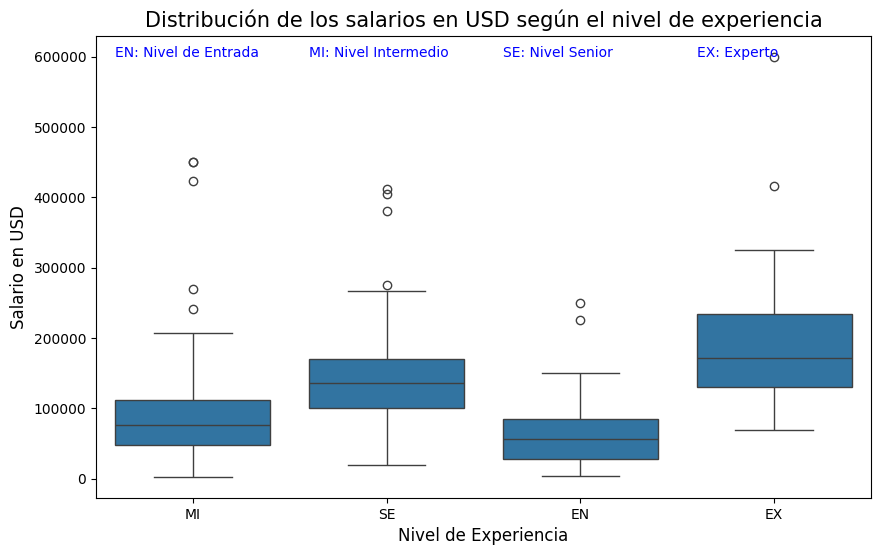

In [5]:
def boxplotExperienciaSalario(df):
  if df is not None and 'experience_level' in df.columns and 'salary_in_usd' in df.columns:
    #Crear el boxplot
    plt.figure(figsize=(10,6))
    sns.boxplot(x='experience_level', y='salary_in_usd', data=df)
    #Personalizar el grafico
    plt.title('Distribución de los salarios en USD según el nivel de experiencia', fontsize=15)
    plt.xlabel('Nivel de Experiencia', fontsize=12)
    plt.ylabel('Salario en USD', fontsize=12)
    # Agregar comentarios sobre los niveles de experiencia
    plt.text(-0.4, df['salary_in_usd'].max(), 'EN: Nivel de Entrada', fontsize=10, color='blue')
    plt.text(0.6, df['salary_in_usd'].max(), 'MI: Nivel Intermedio', fontsize=10, color='blue')
    plt.text(1.6, df['salary_in_usd'].max(), 'SE: Nivel Senior', fontsize=10, color='blue')
    plt.text(2.6, df['salary_in_usd'].max(), 'EX: Experto', fontsize=10, color='blue')
    plt.show()
  else:
    print("El DataFrame esta vacio o no contiene las columnas necesarias")
boxplotExperienciaSalario(data)

## Conclusión

A lo largo de esta exploración del dataset de salarios en Ciencia de Datos, hemos obtenido una visión detallada de varios aspectos clave. Comenzamos por comprender la estructura del dataset y el tipo de información que contiene. A partir de ahí, analizamos la distribución de los datos a través de los años, el trabajo remoto y los diferentes niveles de experiencia.

También identificamos los roles más comunes y mejor pagados, así como las diferencias salariales en función de la experiencia. Los gráficos de densidad y boxplots nos permitieron visualizar cómo se distribuyen los salarios y detectar variabilidad entre los diferentes roles.

Finalmente, estos análisis nos proporcionaron un panorama claro del mercado laboral en ciencia de datos, destacando las tendencias salariales, la importancia de los roles y las modalidades de trabajo.